In [115]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from scipy import stats

%matplotlib inline

In [79]:
df = pd.read_csv("realestate.csv")
df_raw = pd.read_csv("realestate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [36]:
df.shape

(414, 8)

# LINEAR REGRESSION

In [37]:
df.rename(columns={"X2 house age":"age","Y house price of unit area":"price"},inplace=True)
df.drop(columns=["No","X1 transaction date","X3 distance to the nearest MRT station",
                 "X4 number of convenience stores","X5 latitude","X6 longitude"],inplace=True)
df.head()

,age,price
0,32.0,37.9
1,19.5,42.2
2,13.3,47.3
3,13.3,54.8
4,5.0,43.1


We will try to investigate the impact of the age of a house on its price.

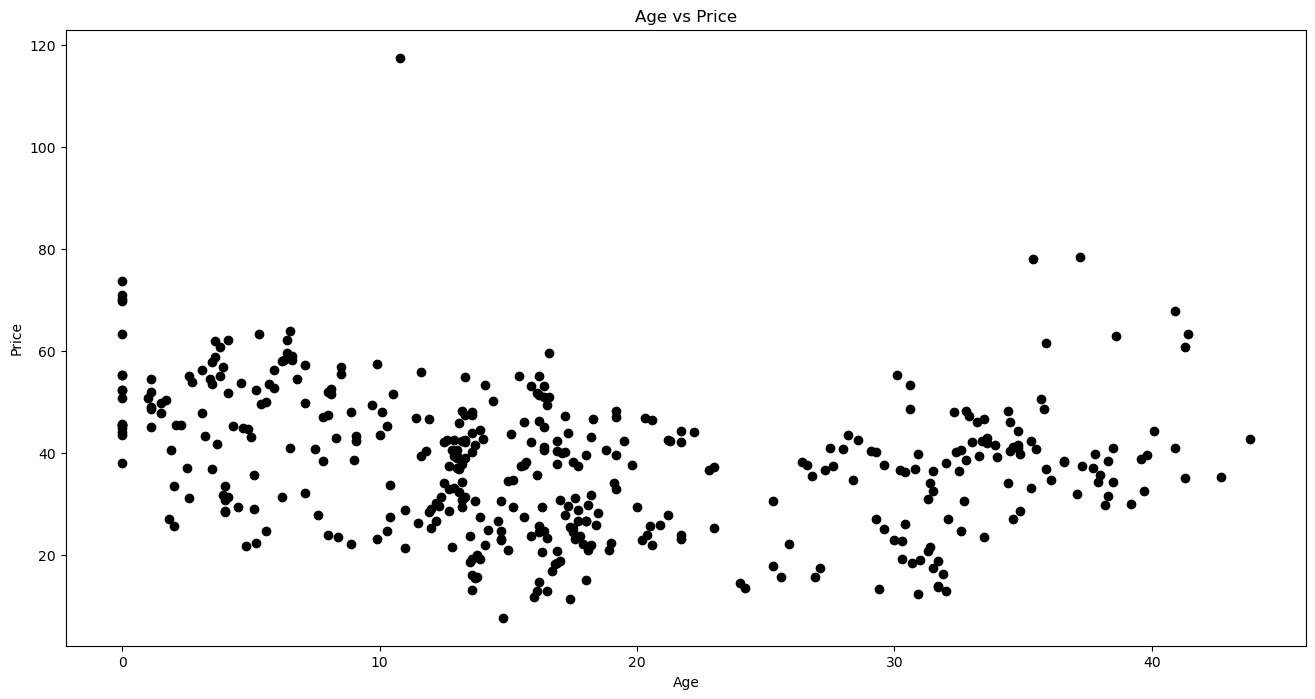

In [67]:
plt.figure(figsize=(16,8))
plt.scatter(df["age"],df["price"],c='black')
plt.xlabel("Age")
plt.ylabel("Price")
plt.title("Age vs Price")
plt.show()

In [47]:
x ,y= df["age"],df["price"]
slope,intercept,r,p,std_err = stats.linregress(x,y)
r

-0.21056704627721687

In [48]:
X = x.values.reshape(-1,1)
Y = y.values.reshape(-1,1)

In [55]:
reg = LinearRegression()
reg.fit(X,Y)
print(reg.intercept_[0])
print(reg.coef_[0][0])

42.4346970462629
-0.25148841908534547


In [63]:
print(f"The equation of the linear model is \n y = {reg.intercept_[0]} - {-reg.coef_[0][0]}*age")

The equation of the linear model is 
 y = 42.4346970462629 - 0.25148841908534547*age


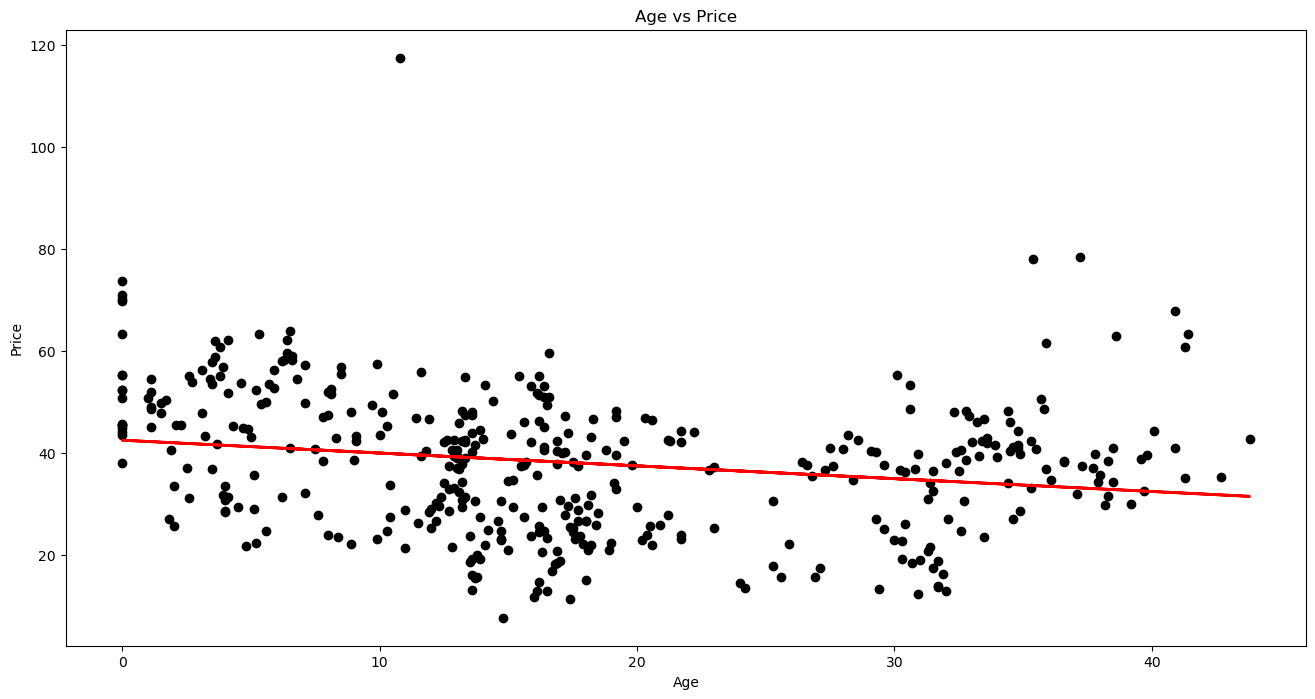

In [73]:
predictions = reg.predict(X)
plt.figure(figsize=(16,8))
plt.scatter(X,Y,c='black')
plt.plot(X,predictions,c='red',linewidth=2)
plt.xlabel("Age")
plt.ylabel("Price")
plt.title("Age vs Price")
plt.show()

In [72]:
r

-0.21056704627721687

A correlation of -0.2 suggests that a high price for a newly built house is okay but is not the determining factor of the price itself. 

In [78]:
exog = sm.add_constant(x)
est = sm.OLS(y,exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     19.11
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.56e-05
Time:                        21:36:25   Log-Likelihood:                -1658.3
No. Observations:                 414   AIC:                             3321.
Df Residuals:                     412   BIC:                             3329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.4347      1.211     35.042      0.0

# MULTIPLE LINEAR REGRESSION

In [80]:
df_raw

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [82]:
Xs = df_raw.drop(["No","X1 transaction date","X5 latitude","X6 longitude","Y house price of unit area"],axis=1)

In [89]:
Xs.rename(columns={"X2 house age":"age","X3 distance to the nearest MRT station":"station",
                   "X4 number of convenience stores":"stores"},inplace=True)
Xs.head()

,age,station,stores
0,32.0,84.87882,10
1,19.5,306.59470,9
2,13.3,561.98450,5
3,13.3,561.98450,5
4,5.0,390.56840,5


In [116]:
ys = df_raw["Y house price of unit area"]

In [98]:
import seaborn as sns

<AxesSubplot:>

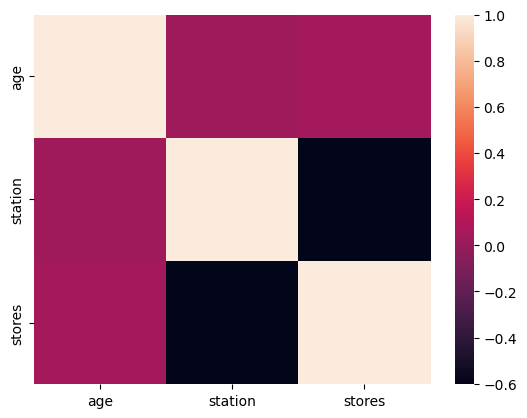

In [99]:
correlation = Xs.corr()
sns.heatmap(correlation)

In [117]:
ys = ys.values.reshape(-1,1)

In [120]:
reg = LinearRegression()
reg.fit(Xs,ys)

LinearRegression()

In [124]:
print(f"y = {reg.intercept_[0]} + {reg.coef_[0][0]}*age + {reg.coef_[0][1]}*station + {reg.coef_[0][2]}*stores")

y = 42.9772862060641 + -0.2528558265877559*age + -0.0053791296239441*station + 1.297442476101934*stores


In [129]:
X = np.column_stack((Xs["age"],Xs["station"],Xs["stores"]))
y = df_raw["Y house price of unit area"].values.reshape(-1,1)

exog = sm.add_constant(X)
est = sm.OLS(y,exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     161.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           5.44e-69
Time:                        00:30:38   Log-Likelihood:                -1506.5
No. Observations:                 414   AIC:                             3021.
Df Residuals:                     410   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9773      1.385     31.041      0.0